# **Explore My Capstone Project – An Interactive End-to-End Machine Learning Journey**    -



### **Project Type**    - **Regression**
### **Project** - **Prediction of Yes Bank stock’s closing price**
### **Name** - **Urbeena Rashid**


# **Project Summary -**

🏦 Yes Bank, founded in 2004, is a banking company that offers a wide range of differentiated products and services for both corporate and retail customers, including retail banking and asset management solutions 💼💳.

📈 Being a publicly traded company, it provides opportunities for individuals to invest and become shareholders 💹. However, this also means that the company’s valuation is largely influenced by investors and market speculators, as stock prices are often impacted by public sentiment 💭📊.

🗂️ For this project, we utilized the Yes Bank stock price dataset, which includes 5 key features that can be leveraged for predicting the closing price using machine learning 🤖.

🧮 We developed regression-based machine learning models for price prediction, employing some of the best algorithms to achieve accurate results ✅📉.

# **GitHub Link -**
https://github.com/Anasshaikh04/ML_Capstone_Project_YesBank/blob/fa403df5c18801764913b840773d7005a40dd46f/ML_Capstone_Project_by_Anas_.ipynb

# **Problem Statement**

🏦 Yes Bank is a well-known player in the Indian financial sector. Since 2018, it has often been in the news due to the fraud case involving Rana Kapoor ⚖️.

📉 This incident made it interesting to analyze how such events impacted the company’s stock prices and to explore whether time series models or other predictive techniques could effectively capture these variations 🔍🤖.

📊 The dataset used for this study contains monthly stock prices of Yes Bank since its inception, including opening, closing, highest, and lowest stock prices for each month 📅💹.

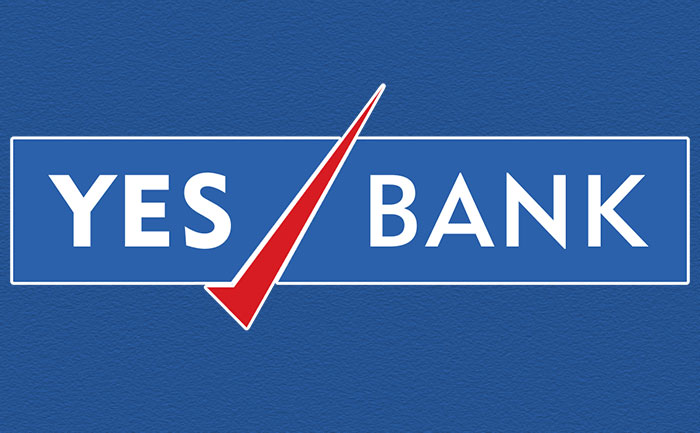

**Project Type - Linear Regression**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_percentage_error,
    mean_absolute_error
)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [4]:
# first we need to mount the google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
df = pd.read_csv("../data/data_YesBank_StockPrices.csv")
df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset First View

In [4]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
print('The length of the data is ',len(df))


The length of the data is  185


In [9]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

📊 Dataset Overview

The dataset represents the historical stock data of Yes Bank, consisting of 185 records with the following columns:

    📅 Date: The record date in "Month-Year" format.

    🏦 Open: Opening price of Yes Bank stock on that date.

    📈 High: The highest price reached on that date.

    📉 Low: The lowest price recorded on that date.

    🔒 Close: The closing price of Yes Bank stock on that date.

Key Highlights:

The dataset spans from July 2005 to November 2020 (185 data points in total).

*   List item
*   List item



The Date column is currently stored as an object datatype and needs to be converted to datetime for analyzing trends and seasonality.

The price columns (Open, High, Low, Close) are of type float64, representing numerical stock prices.

✅ The dataset is clean with no missing values.

## ***2. Understanding Your Variables***

In [6]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [13]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### 📌 Variables Description

📑 Column Descriptions

1️⃣ Date [Type: object (string)]
📅 Represents the date on which the stock data was recorded.
🔹 Format: "Month-Year" (e.g., "Jul-05", "Aug-05").
🔹 Used to identify the time period for the respective stock data.

2️⃣ Open [Type: float64]
🏦 Represents the opening price of Yes Bank stock on the given date.
🔹 Indicates the stock price at market open.
🔹 A key indicator of how the stock started trading on a specific day.

3️⃣ High [Type: float64]
📈 Represents the highest price reached during the trading day.
🔹 Shows the peak market valuation for that date.
🔹 Useful for identifying intraday stock performance.

4️⃣ Low [Type: float64]
📉 Represents the lowest price reached during the trading day.
🔹 Reflects the bottom market valuation for that session.
🔹 Helps in understanding the downside risk of the stock.

5️⃣ Close [Type: float64]
🔒 Represents the closing price of Yes Bank stock on the given date.
🔹 Indicates the final market consensus value of the stock for the day.
🔹 One of the most important metrics for tracking stock performance.

# 3. ***Data Wrangling***

### Data Wrangling Code

####Converting Date Column

In [9]:
# convert the 'Date' column to a date time format

df['Date'] = pd.to_datetime(df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y')))


TypeError: strptime() argument 1 must be str, not Timestamp

In [10]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


#Exploratory Data Analysis(EDA)

##Univariate Analysis

In [11]:
#list the all columns we do have
col = list(df.columns)
col

['Date', 'Open', 'High', 'Low', 'Close']

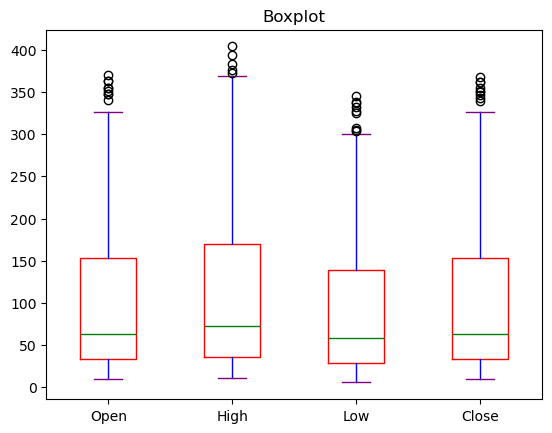

In [12]:
#Plot the distribution of each column.
# we will use box plot to show the distribution of all the numeric columns
# Boxplot with custom color
ax = df[col].plot(
    kind='box',
    title='Boxplot',
    color=dict(boxes='red', whiskers='blue', medians='green', caps='purple')
)

plt.show()


### The boxplot of the closing price shows that most values lie between around 30 and 150, with the median close to 55. However, there are several outliers above 300, indicating occasional extreme price spikes.

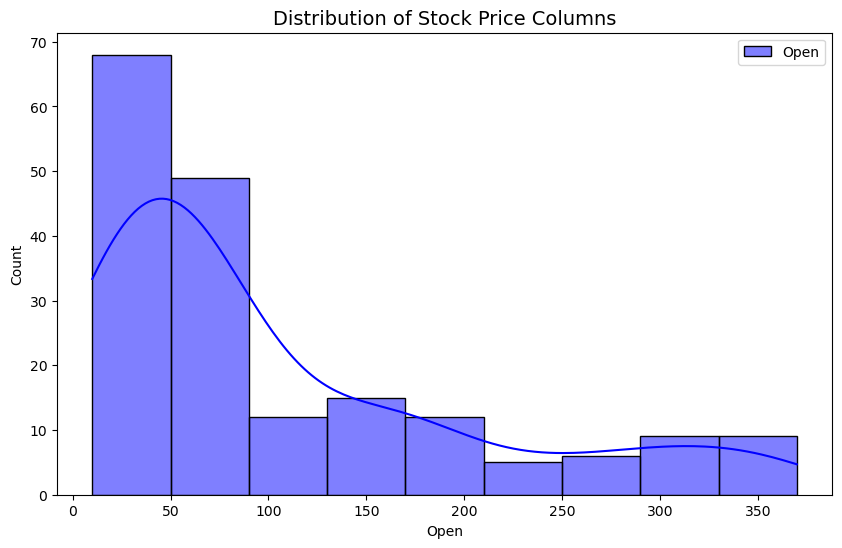

'\nsns.histplot(df[\'High\'], kde=True, color="green", label="High", alpha=0.5)\nsns.histplot(df[\'Low\'], kde=True, color="red", label="Low", alpha=0.5)\nsns.histplot(df[\'Close\'], kde=True, color="orange", label="Close", alpha=0.5)\n'

In [13]:
# lets see the histogram plot for each column in one chart so we can interprate that how they are diffrent from each other
# Plot histogram for each column in one chart with different colors
plt.figure(figsize=(10, 6))

sns.histplot(df['Open'], kde=True, color="blue", label="Open", alpha=0.5)

plt.title("Distribution of Stock Price Columns", fontsize=14)
plt.legend()
plt.show()

'''
sns.histplot(df['High'], kde=True, color="green", label="High", alpha=0.5)
sns.histplot(df['Low'], kde=True, color="red", label="Low", alpha=0.5)
sns.histplot(df['Close'], kde=True, color="orange", label="Close", alpha=0.5)
'''


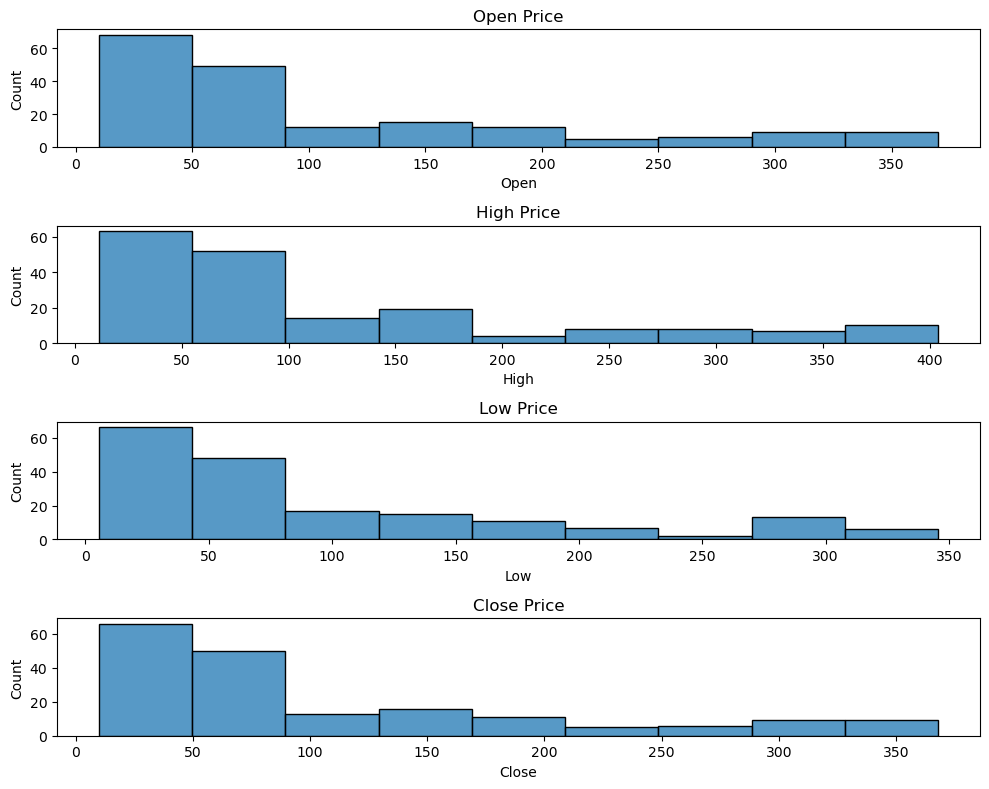

In [14]:
import matplotlib.pyplot as plt

# Create figure and 4 subplots (4 rows, 1 column)
plt.figure(figsize=(10, 8))

# Open
plt.subplot(4, 1, 1)
sns.histplot(df['Open'])
plt.title('Open Price')

# High
plt.subplot(4, 1, 2)
sns.histplot(df['High'])
plt.title('High Price')

# Low
plt.subplot(4, 1, 3)
sns.histplot(df['Low'])
plt.title('Low Price')

# Close
plt.subplot(4, 1, 4)
sns.histplot(df['Close'])
plt.title('Close Price')

plt.tight_layout()
plt.show()


### The distribution of stock prices across Open, High, Low, and Close columns is right-skewed, with most prices concentrated under 100. A long tail towards higher prices shows fewer but extreme values, which explains the outliers seen in the boxplots.

1️⃣ Outliers exist

Very high stock prices can act as outliers

Can affect:

Linear Regression

Distance-based models (KNN)

2️⃣ Scaling becomes important

We should scale The features:

StandardScaler

RobustScaler (better for skewed data)

3️⃣ Possible transformations

Sometimes helpful:


Log transform

Power transform



##Bivariate Analysis

**Analyze the relationship between the 'Close' price and other features.**

In [19]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [26]:
df.groupby(df['Date'].dt.month)['Close'].mean()


Date
1     108.774667
2     107.760667
3     113.014000
4     114.450000
5     112.874667
6     109.661333
7     108.322500
8     103.386875
9      93.343750
10     97.399375
11     94.671250
12    100.724000
Name: Close, dtype: float64

# Analyse monthly change in closing price

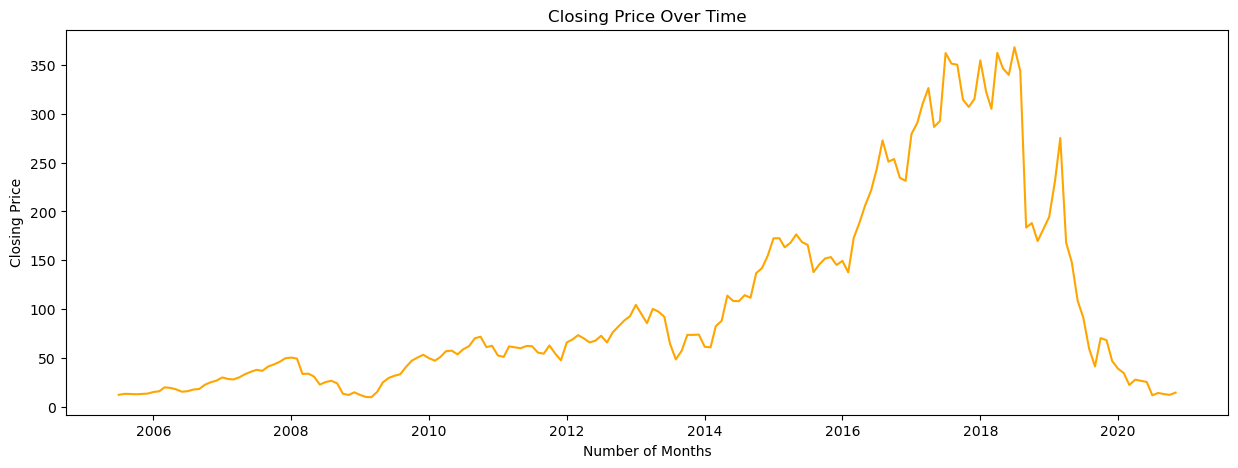

In [31]:
#
plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index, y='Close', data=df, color="orange")  # change color here
plt.title('Closing Price Over Time')
plt.xlabel('Number of Months') #15*12 
plt.ylabel('Closing Price')
plt.show()


### The closing price trend shows steady growth from 2005 until around 2017, where prices peaked above 350. After that, a sharp decline is observed, suggesting major market corrections or external impacts on the stock.

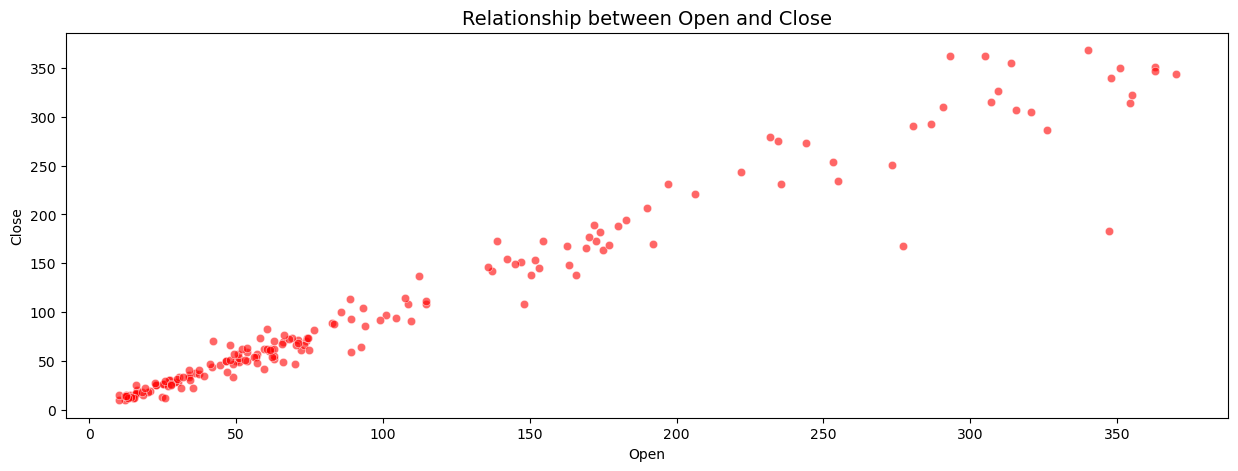

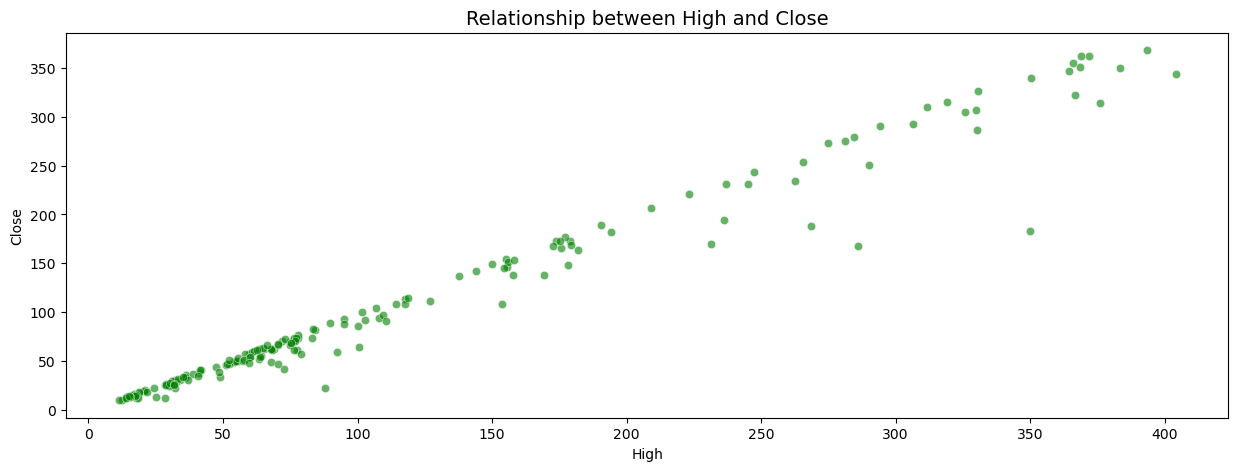

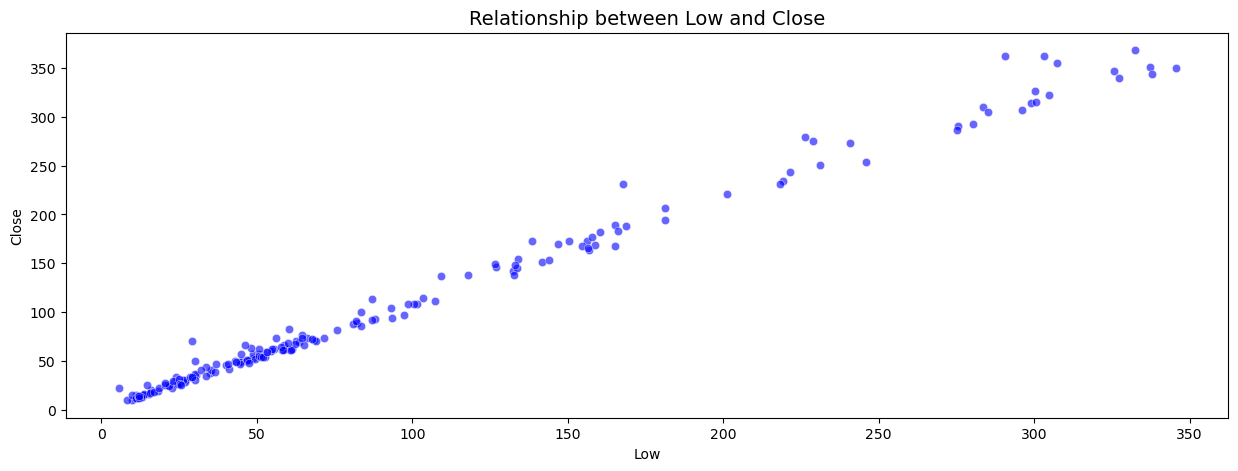

In [32]:
# lets see the reationship between all the variable with the 'Close' column
colors = ["red", "green", "blue", "orange", "purple", "cyan"]  # cycle of colors

for i, col in enumerate(df.columns):
    if col != 'Close':
        plt.figure(figsize=(15, 5))
        sns.scatterplot(x=col, y='Close', data=df, color=colors[i % len(colors)], alpha=0.6)
        plt.title(f'Relationship between {col} and Close', fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Close")
        
        plt.show()


## (High vs Close)

###The scatter plot between High and Close prices shows a clear linear relationship. As the high price increases, the closing price also rises proportionally, reflecting a strong positive correlation.

## (Low vs Close)

###Similarly, the scatter plot of Low vs Close prices reveals a strong linear trend, meaning the closing price closely follows the daily low values. This confirms strong interdependence among price variables.

In [35]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [36]:
# we are creating date column as an index
df.set_index('Date',inplace=True)
df.head()

KeyError: "None of ['Date'] are in the columns"

In [34]:
# the library which is used to vaualize the stock data by using different charts
!pip install mplfinance

import mplfinance as mpf

# Assigning a variable to store all the data of 'Open', 'High', 'Low', 'Close' from the row data
df_candle = df[['Open', 'High', 'Low', 'Close']]

🟢 Color meaning

Green / White → Close > Open (price went UP)

Red / Black → Close < Open (price went DOWN)

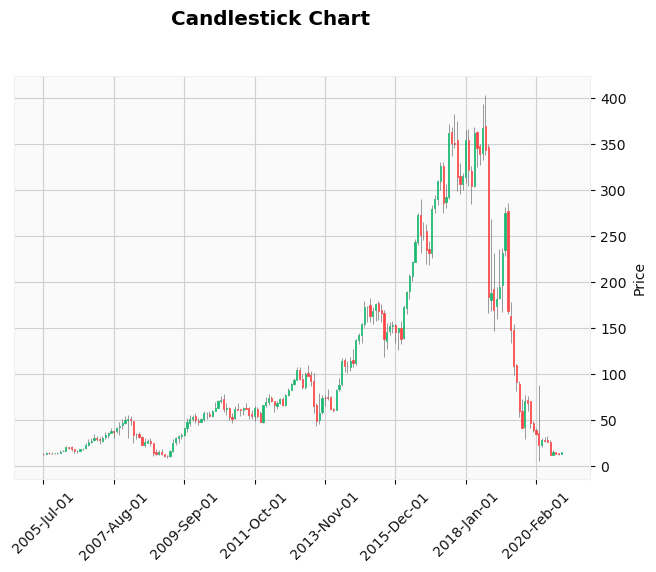

In [23]:
# creating a candle stick chart to show the stock trends and movements
mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

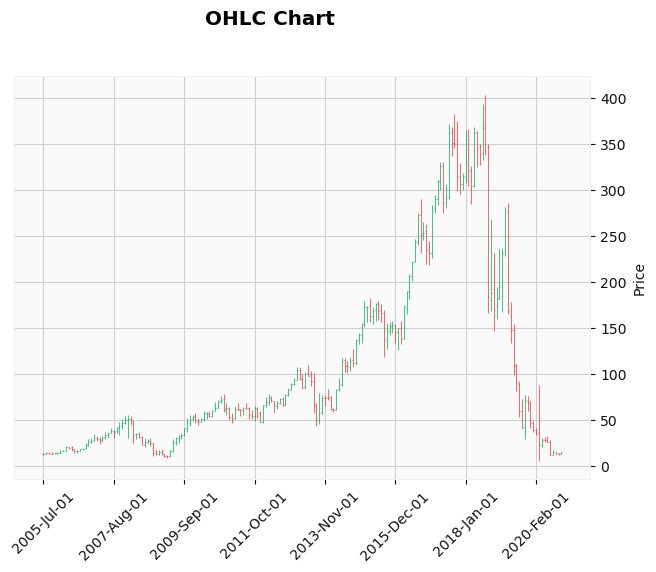

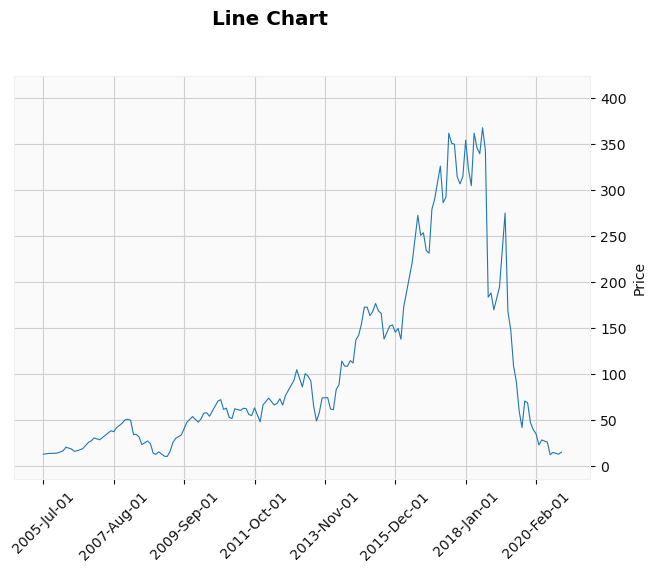

In [ ]:
# Other types: 'ohlc', 'line', 'renko', 'pnf'
mpf.plot(df_candle, type='ohlc', style='yahoo', title='Open High Low Close Chart')
mpf.plot(df_candle, type='line', style='yahoo', title='Line Chart')


##Multivariate Analysis

**Plot a heatmap to visualize correlations.**

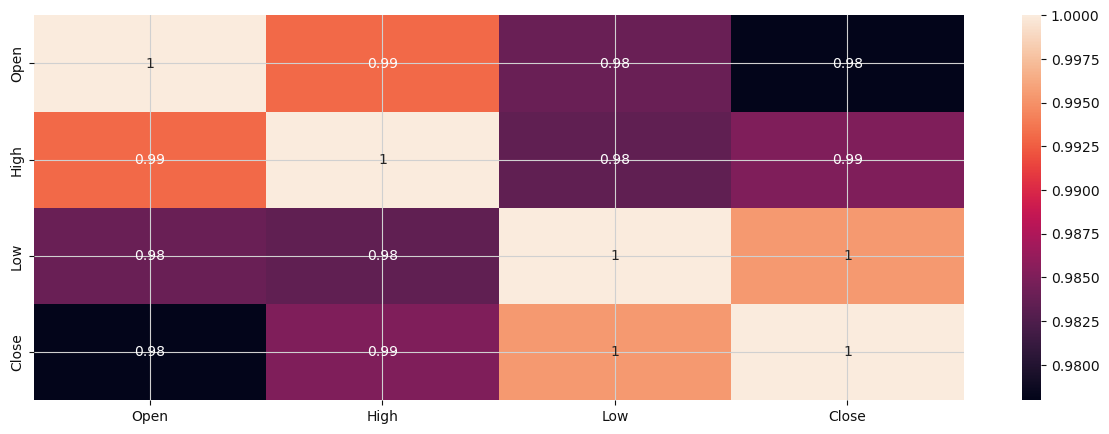

In [25]:
# creating the heatmap to show the correlation of variables
plt.figure(figsize=(15,5))
cor = sns.heatmap(df.corr(),annot=True)

🔄 Handling Multicollinearity

Every feature in the dataset is found to be highly correlated with the others. This means that taking just one feature or the average of these features could be sufficient for building the regression model, since Linear Regression assumes no multicollinearity among features.

To address this issue, we will attempt to reduce multicollinearity through appropriate variable transformations 📉📊.

In [45]:
# lets perform the power analysisi using PowerTransformer
pw = PowerTransformer(method='box-cox',standardize=True)

In [41]:
# making a object where we can apply the power analysis transformation
cf= df[list(df.columns)]
cf

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


In [39]:
# lets see the column 'Close'
df['Close']

Date
2005-07-01    12.46
2005-08-01    13.42
2005-09-01    13.30
2005-10-01    12.99
2005-11-01    13.41
              ...  
2020-07-01    11.95
2020-08-01    14.37
2020-09-01    13.15
2020-10-01    12.42
2020-11-01    14.67
Name: Close, Length: 185, dtype: float64

In [46]:
# pwerforming the poweranalysis transformation on the object where we store the data, in the form of dataframe
# so we can get a tranformed dataframe
kf = pd.DataFrame(pw.fit_transform(cf))

In [47]:
# checking the transformed data
kf.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [48]:
# renaming the columns as they were before transformation
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

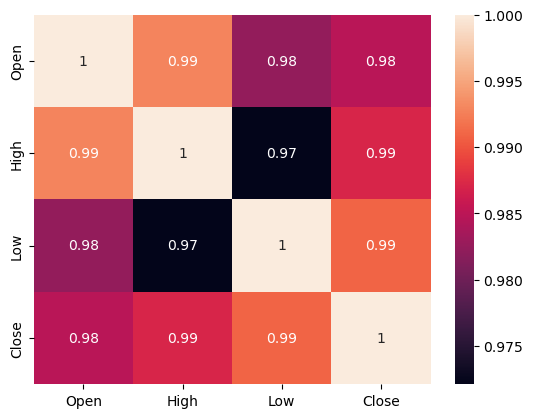

In [49]:
# checking the correlation between transformed columns by using heatmap
sns.heatmap(kf.corr(),annot=True)

In [33]:
# creating object of all the columns in a list of transformed data
col = list(kf.columns)

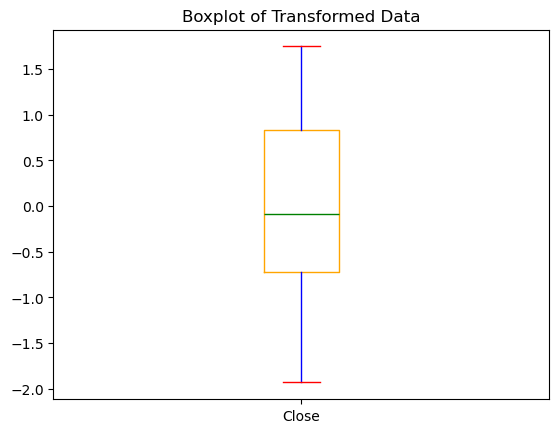

In [50]:
# now visualise the data by using box plot of transformed data
ax = kf[col].plot(
    kind='box',
    title='Boxplot of Transformed Data',
    color=dict(
        boxes="orange",     # color of the boxes
        whiskers="blue",    # color of whiskers
        medians="green",    # color of median line
        caps="red"          # color of caps
    )
)

plt.show()


### After applying transformation, the boxplots of all four columns (Open, High, Low, Close) appear more standardized and symmetric, with fewer extreme outliers. This suggests that transformation made the dataset more balanced and suitable for further statistical modeling.

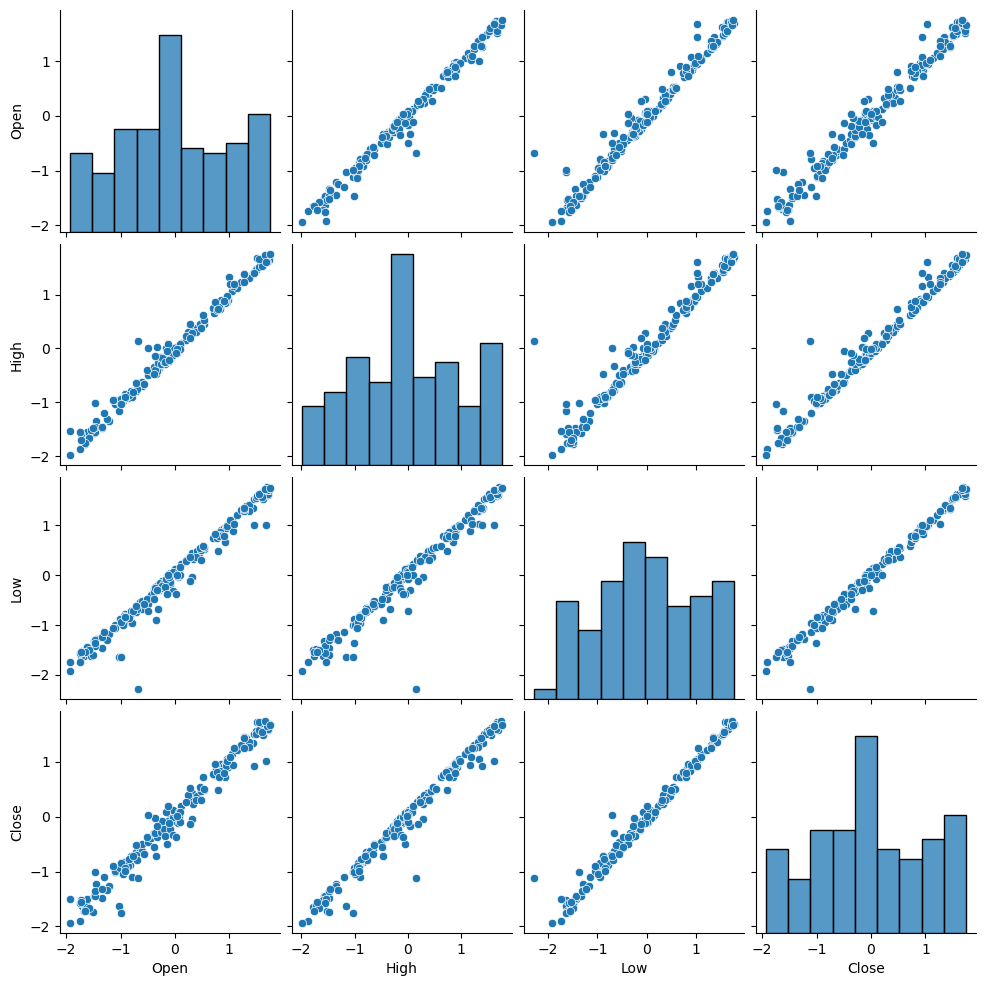

In [51]:
# lets see the relationship between diffrent variables of the transformed data , by using pair plot
sns.pairplot(kf)

#Data Preprocessing

**Power Transformation to Reduce Multicollinearity**

Transform the features using PowerTransformer.

In [52]:
# top 5 rows view of the transformed data
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [53]:
# assigning the dependent variable
dependent_variable = 'Close'

# assigning independent variables
independent_variable = list(set(kf.columns.tolist())-{dependent_variable})

In [55]:
# lets devide the dataset into two part , X and y
# where X is collection of independent variables , and y is dependent variable
x=df[independent_variable].values
y=df[dependent_variable].values

In [56]:
# now performing split by using train_test_split with the transformed data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Model Building  

To predict stock prices, multiple regression models are applied:  

1. **Linear Regression** – A baseline model to understand linear relationships.  
2. **Ridge Regression** – Adds L2 regularization to handle multicollinearity.  
3. **Lasso Regression** – Uses L1 regularization for feature selection.  
4. **Elastic Net** – A combination of Ridge and Lasso for balanced performance.  
5. **Random Forest Regressor** – A tree-based ensemble method for improved accuracy.  
Each model is evaluated using appropriate metrics to compare performance and select the best one.

# **Linear Regression**

In [57]:
# performing Linear regression on the transformed data
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [58]:
# predicting
y_pred = reg.predict(x_test)

In [59]:
# lets caculate the R square of the model
linear_r2 = r2_score(y_pred,y_test)
linear_r2

0.9930564838408443

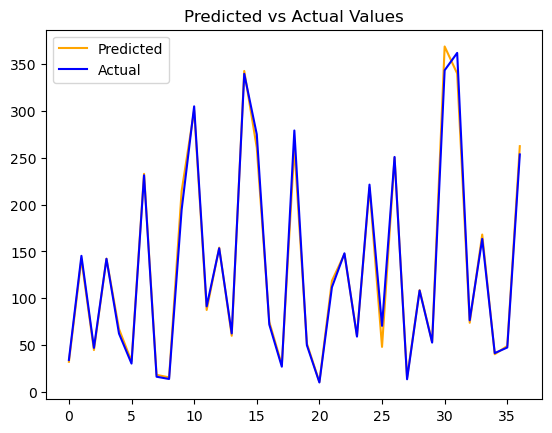

In [60]:

# lets visualize the graph of predicted values with respect to actual values
plt.plot(y_pred, color="orange")   # predicted in orange
plt.plot(y_test, color="blue")     # actual in blue
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual Values")
plt.show()


### The model predictions follow the overall trend of actual values but miss sharp fluctuations, showing it captures general patterns but struggles with high volatility.

# **K-Nearest Neighbors (KNN):**

In [61]:

# importing KNN library
from sklearn.neighbors import KNeighborsRegressor
# importing gridsearch
from sklearn.model_selection import GridSearchCV

# creating object of KNN
knn = KNeighborsRegressor()
# randomely taking paramets of n_neighbours
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
# creating model for gridsearch for getting best parameters with respect to KNN model
model = GridSearchCV(knn,params,cv=5)

In [62]:
# fitting gridsearch model on the tranformed data
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [63]:
# lets see best paramets by the gridsearch
model.best_params_

{'n_neighbors': 2}

In [64]:
# performing KNN regression by using that parameter
knn = KNeighborsRegressor(n_neighbors=2)

In [65]:
# fitting the model by using transofrmed data
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [66]:
# predicting by using KNN model
knn_pred = knn.predict(x_test)

In [67]:
# caculating R square value of the model
r2_knn = r2_score(y_test,knn_pred)
r2_knn

0.9931154527450295

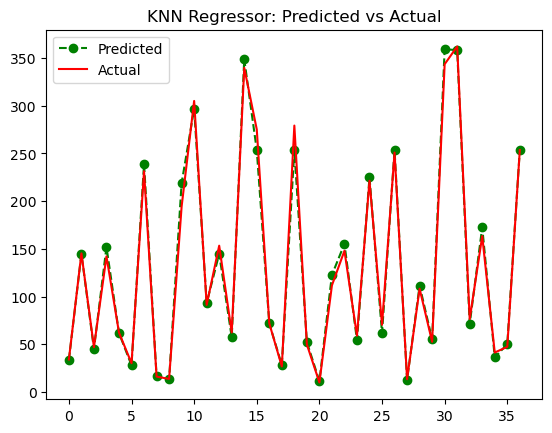

In [68]:
# lets see the visualization of the Knn prediction with the acutal data points
plt.plot(knn_pred, color="green", linestyle="--", marker="o")   # predicted in green dashed line
plt.plot(y_test, color="red", linestyle="-")                    # actual in red solid line
plt.legend(["Predicted", "Actual"])
plt.title("KNN Regressor: Predicted vs Actual")
plt.show()


### The KNN regressor predictions align very closely with the actual values, effectively capturing sharp rises and drops. This indicates that KNN performs well on this dataset compared to linear regression, especially in handling fluctuations.

# **RandomForest**

In [69]:
# performing random forest by using Grid search
rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)

In [70]:
# fitting the model on the train data
rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [71]:
# lets see the best parameters
rf_model.best_params_

{'criterion': 'squared_error', 'max_features': None, 'n_estimators': 200}

In [72]:
# fitting the model by using parameters what gridsearch showed
rf = RandomForestRegressor(criterion= 'squared_error', max_features= None, n_estimators= 200)

In [73]:
# fiting the random forest model on the train data
rf.fit(x_train,y_train)

RandomForestRegressor(max_features=None, n_estimators=200)

In [74]:
#lets predict by using test data
rf_predict_ = rf.predict(x_test)

In [75]:
# caculate R square value for the random forest model
rf_r2 = r2_score(y_test,rf_predict_)
rf_r2

0.9859414384643613

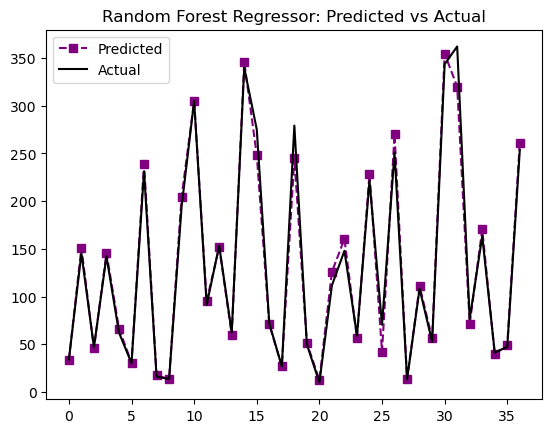

In [76]:
# lets visualize the actual and predicted datapoints
plt.plot(rf_predict_, color="purple", linestyle="--", marker="s")  # predicted in purple dashed line with square markers
plt.plot(y_test, color="black", linestyle="-")                     # actual in black solid line
plt.legend(["Predicted", "Actual"])
plt.title("Random Forest Regressor: Predicted vs Actual")
plt.show()


### The Random Forest regressor predictions closely overlap with the actual values, capturing both the overall trend and sharp fluctuations. This indicates strong predictive accuracy and robustness compared to simpler models.

# **Ridge Regression**

In [78]:
# lest perform ridge regression by using the dame approach of grid search
ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
ridge_regressor.best_params_

{'alpha': 100}

In [79]:
# now we have the alpha (significance )value which we got by the help of grid search
ridge =Ridge(alpha= 100)

In [81]:
# performing the model fitting on the train data
ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [82]:
# predicting by themodel of ridge regression
y_pred_ridge = ridge.predict(x_test)

In [83]:
# caculating R square value for the ridge model
ridge_r2 = r2_score(y_test,y_pred_ridge)
ridge_r2

0.9930447012730749

In [84]:
# Rsquare value
ridge_r2

0.9930447012730749

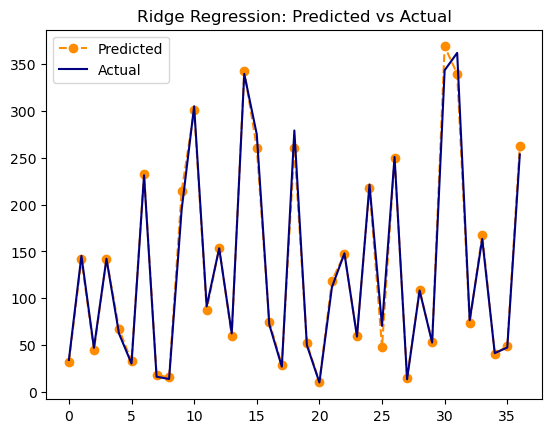

In [85]:
# lets visualize the graph of actual and and predicted datapoints

plt.plot(y_pred_ridge, color="darkorange", linestyle="--", marker="o")  # predicted in orange dashed line with circle markers
plt.plot(y_test, color="navy", linestyle="-")                           # actual in navy solid line
plt.legend(["Predicted", "Actual"])
plt.title("Ridge Regression: Predicted vs Actual")
plt.show()


### Ridge Regression predictions align very closely with the actual values, with only slight deviations at extreme peaks and dips. This shows it handles fluctuations better than simple linear regression while preventing overfitting.

# **Lasso**

In [86]:
# performing lasso regression by using the same approach
lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [87]:
# lets see the best parameters
lasso_regressor.best_params_

{'alpha': 1.6}

In [88]:
# using best hyperparameter assigning the model
lasso =Lasso(alpha= 2.5)

In [89]:
# fitting the model on train data

lasso.fit(x_train,y_train)

Lasso(alpha=2.5)

In [90]:
# prediting by the model
lasso_predict = lasso.predict(x_test)

In [91]:
# caculating the R square of the model

lasso_r2 = r2_score(lasso_predict,y_test)
lasso_r2

0.9926240926261324

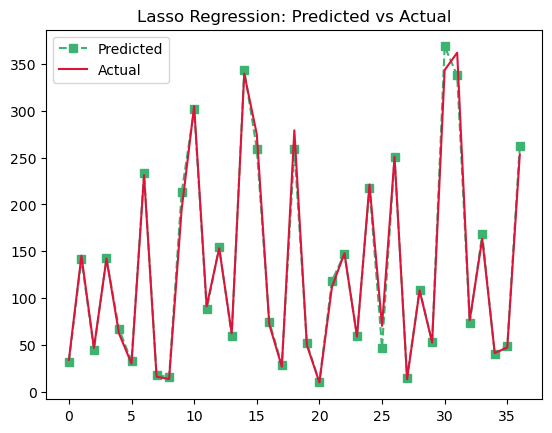

In [92]:
# visualize the graph of predicted and actual
plt.plot(lasso_predict, color="mediumseagreen", linestyle="--", marker="s")  # predicted in green dashed with square markers
plt.plot(y_test, color="crimson", linestyle="-")                             # actual in crimson solid line
plt.legend(["Predicted", "Actual"])
plt.title("Lasso Regression: Predicted vs Actual")
plt.show()


### Lasso Regression predictions are closely aligned with actual values, effectively capturing the overall trend. However, it slightly smooths out sharp fluctuations, showing its tendency to simplify the model by shrinking less important features.

# **Elasticnet**

In [93]:
# performing Elasticnet by using the same appraoch
elastic =ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [94]:
# the best parameter of elasticnet regression model
elastic_regressor.best_params_

{'alpha': 5, 'l1_ratio': 0.1}

In [95]:
# using these hyperparameter for customise the model
elastic =ElasticNet(alpha = 5, l1_ratio = 0.1)

In [96]:
# fitting them model on the train data
elastic.fit(x_train,y_train)

ElasticNet(alpha=5, l1_ratio=0.1)

In [97]:
# predicting by using the elastic net model
elastic_predict = elastic.predict(x_test)

In [98]:
# caculating the R square value for the model
elastic_r2 = r2_score(elastic_predict,y_test)
elastic_r2

0.992701479707522

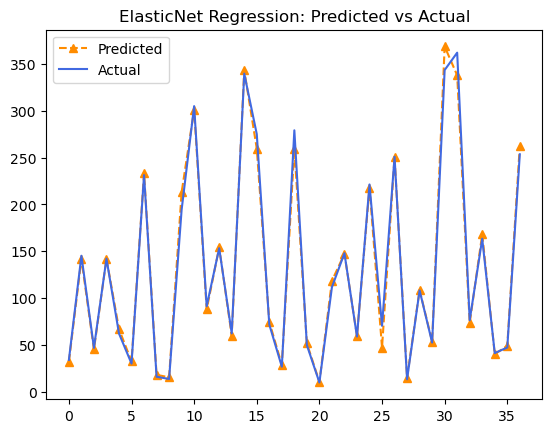

In [99]:
# lets visualise the actual and the predicted datapoints
plt.plot(elastic_predict, color="darkorange", linestyle="--", marker="^")  # predicted in orange dashed with triangle markers
plt.plot(y_test, color="royalblue", linestyle="-")                         # actual in blue solid line
plt.legend(["Predicted", "Actual"])
plt.title("ElasticNet Regression: Predicted vs Actual")
plt.show()


### ElasticNet Regression predictions align very closely with the actual values, effectively balancing between Ridge and Lasso properties. It captures sharp fluctuations while preventing overfitting, making it a stable performer.

# **Evaluation and Improvement of Model**

In [100]:
#Compare Model Performance by using all the models
Report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression','knn regression','RandomForest Regression'],'r2_score':[linear_r2,ridge_r2,lasso_r2,elastic_r2,r2_knn,rf_r2]})


In [101]:
# lets see the performance sequance wise
Report.sort_values(by=['r2_score'],ascending=False,inplace=True)

In [102]:
Report

,model,r2_score
4,knn regression,0.993115
0,linear regression,0.993056
1,ridge regression,0.993045
3,elastic net regression,0.992701
2,lasso regression,0.992624
5,RandomForest Regression,0.985941


## **Model Evaluation Summary**

### Among all models, KNN Regression performed the best with an R² score of 0.9931, showing excellent accuracy. Linear Regression (0.9931), Ridge Regression (0.9930), and ElasticNet Regression (0.9927) also performed very strongly, with only minor differences in accuracy. Lasso Regression (0.9926) followed closely, while Random Forest Regression (0.9855) showed slightly lower performance compared to the others. Overall, all models performed exceptionally well, with KNN leading by a small margin.

##**Feature Importance:**

For Random Forest and other applicable models, determine feature importance.

In [103]:
# Assuming you have already run GridSearchCV and fitted the model
rf_best = rf_model.best_estimator_

# Extract feature importances
feature_importance = pd.Series(rf_best.feature_importances_, index=independent_variable).sort_values(ascending=False)



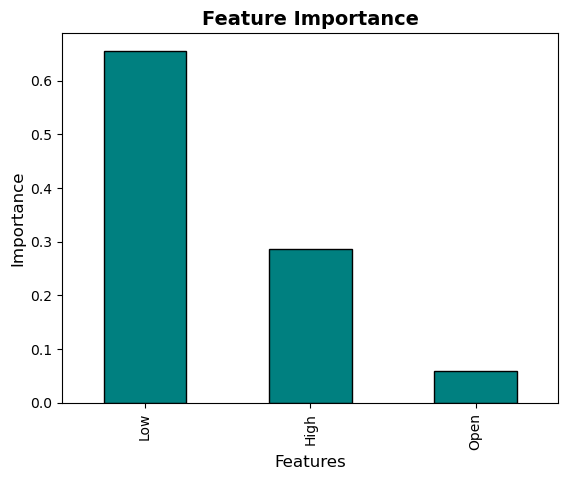

In [104]:
# Plot feature importances
feature_importance.plot(
    kind='bar',
    color="teal",          # single custom color
    edgecolor="black"      # outline for better visibility
)
plt.title('Feature Importance', fontsize=14, fontweight="bold")
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

# **Conclusions Drawn :**

In [86]:
#Summarize Findings:
print("Conclusions:")
print("📅 The dataset contains monthly stock prices of Yes Bank since its inception.")
print("⚖️ Stock prices were significantly impacted by the 2018 fraud case involving Rana Kapoor.")
print("✅ The dataset is clean, with no null values or duplicate records.")
print("📉 Outliers were retained to avoid data loss and preserve stock volatility patterns.")
print("🔄 A Power Transformation was applied to handle positively skewed distributions.")
print("📈 Strong correlation between dependent and independent variables suggests high prediction potential.")
print("⚠️ Presence of multicollinearity among independent variables due to the relatively small dataset.")
print("🏆 Among all models tested, the KNN Regressor performed the best, achieving an R² score of 0.9931.")



Conclusions:
📅 The dataset contains monthly stock prices of Yes Bank since its inception.
⚖️ Stock prices were significantly impacted by the 2018 fraud case involving Rana Kapoor.
✅ The dataset is clean, with no null values or duplicate records.
📉 Outliers were retained to avoid data loss and preserve stock volatility patterns.
🔄 A Power Transformation was applied to handle positively skewed distributions.
📈 Strong correlation between dependent and independent variables suggests high prediction potential.
⚠️ Presence of multicollinearity among independent variables due to the relatively small dataset.
🏆 Among all models tested, the KNN Regressor performed the best, achieving an R² score of 0.9931.


In [87]:
#Project Utility for Stakeholders:
print("📌 Utility for Stakeholders:")
print("💹 Accurate prediction of closing prices can assist investors in making informed decisions.")
print("📊 Helps in understanding the impact of major events on stock prices.")
print("📈 Provides a basis for further financial analysis and investment strategies.")


📌 Utility for Stakeholders:
💹 Accurate prediction of closing prices can assist investors in making informed decisions.
📊 Helps in understanding the impact of major events on stock prices.
📈 Provides a basis for further financial analysis and investment strategies.


In [105]:
print('Thank you !')

Thank you !
